# APLICACIONES DE CIENCIAS DE LA COMPUTACION (INF265)
(Segundo Semestre 2023)

# Laboratorio 10: Redes neuronales
Indicaciones generales:

- Duración: **120 minutos (2 horas)**.
- **Las respuestas deben contar con un buen fundamento teórico**, se realizarán descuentos en el puntaje a respuestas que no contesten a lo solicitado.
- Cualquier indicio de plagio resultará en la anulación de la prueba.
- Debe presentar sus respuestas en base a los resultados de ejecución en los casos que se solicite.
- **No se calificarán aquellas respuestas que no presenten un resultado de ejecución o que no concuerden con este.**
- Subir el cuadernillo con el nombre **Lab10_código.ipynb**, donde código es su código PUCP de 8 dígitos.  
- Se tomará en cuenta en la calificación el uso de comentarios relevantes.

Objetivos:
- Realizar una red neuronal que pueda detectar de que tipo de prenda de vestir se trata a partir de una imagen.


## Entendimiento del problema
El dataset Fashion-MNIST se trata de un conjunto de datos de 60.000 imágenes en escala de grises de 28x28 de 10 categorías de moda, junto con un conjunto de prueba de 10.000 imágenes. Este conjunto de datos se puede utilizar como reemplazo directo de MNIST.

Las clases son:

Label	Description.
- 0	T-shirt/top
- 1	Trouser
- 2	Pullover
- 3	Dress
- 4	Coat
- 5	Sandal
- 6	Shirt
- 7	Sneaker
- 8	Bag
- 9	Ankle boot

Debe implementar un código que pueda detectar de que tipo de prenda de vestir se trata a partir de una imagen.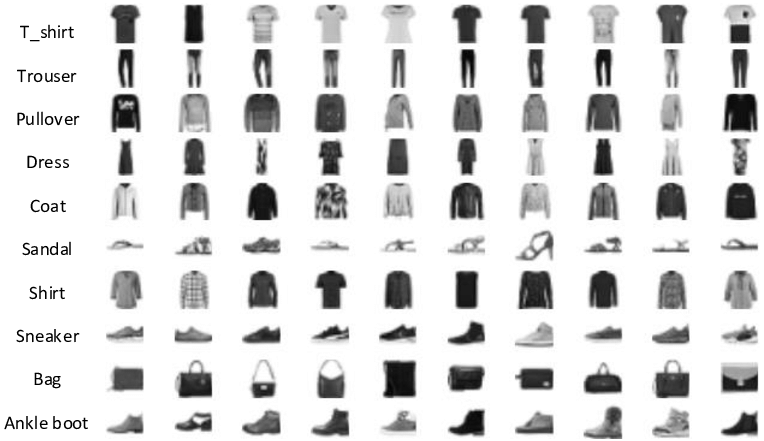

# Red neuronal MLP para clasificacion de imagenes de digitos (dataset MNIST)



In [1]:
# Cargar librerias y modulos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split  # para partir los datos en conjuntos de entrenamiento y validacion
from sklearn.model_selection import KFold  # para partir la data en k-folds
from sklearn.model_selection import cross_val_score   # para evaluar algoritmos en cross validacion

from sklearn.metrics import accuracy_score, balanced_accuracy_score   # para manejar metricas de desempeño
from sklearn.metrics import classification_report  # para hacer reportes de resultados de clasificacion
from sklearn.metrics import confusion_matrix  # para manejar matrices de confusion

import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

**P1.(1 pt) Cargue el dataset de train y validacion de fashion_mnist**  (se encuentra en keras.datasets.fashion_mnist).

In [3]:
#Escriba su código aqui
mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


**P2.(2 pt) Muestre las primeras 18 imagenes de train**

Train: X=(60000, 28, 28), y=(60000,)
Validacion: X=(10000, 28, 28), y=(10000,)


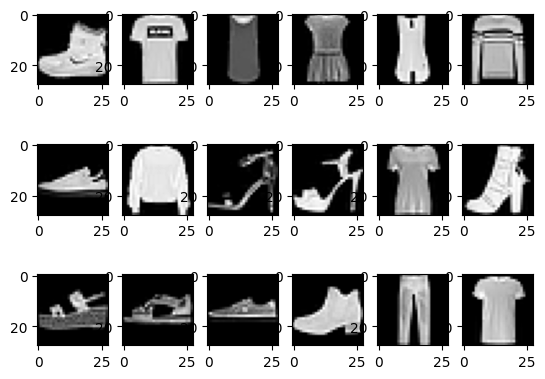

In [10]:
# muestra la cantidad de datos cargados en conjuntos de train y test
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Validacion: X=%s, y=%s' % (X_valid.shape, y_valid.shape))

# muestra las primeras 18 imagenes


for i in range(18):
    # define subplots
    plt.subplot(3,6, 1 + i)
    # plotea raw pixels
    plt.imshow(X_train[i], cmap=plt.cm.gray)
plt.show()
#Escriba su código aqui

**P3.(2 pt) Convertir el target de train y validation en vectores one-hot.  Indique por qué es necesario hacer esto**

In [11]:
#Escriba su código aqui
y_train_onehot = keras.utils.to_categorical(y_train)
y_valid_onehot = keras.utils.to_categorical(y_valid)

In [ ]:
print(y_train_onehot.shape)
print(y_valid_onehot.shape)

[Justificativa de la necesidad de hacer one-hot encoding en el target:]

La necesidad de hacer one-hot encoding es que esto simplifica el proceso de entrenamiento y hace que los modelos sean mas eficientes. Sobretodo nos
ayuda a entender las relaciones entre las diferentes clases, en este caso si clasificamos las prendas cada dato tendria un vector segun su clase donde va a 1 si la clase es correcta y 0 si no es su clase. Ejm. una imagen de un zapato tiene 1 en clase zapato y 0 en las demás clases


**P4.(2 pt) Escala los pixels al rango entre 0-1.  Indique por qué es necesario hacer este escalamiento**

Para facilitar el aprendizaje de redes neuronales es bueno escalar los valores de los pixels al rango de [0-1]

In [12]:

#Escriba su código aqui

# convierte primero los pixels en numeros de punto flotante
X_train_norm = X_train.astype('float32')
X_valid_norm = X_valid.astype('float32')
# normaliza al rango 0-1
X_train_norm = X_train_norm / 255.0
X_valid_norm = X_valid_norm / 255.0

[Justificativa de la necesidad de hacer escalamiento a las imagenes:]

La necesidad de esto sobre todo es la de hacer que el entrenamiento sea mucho más eficiente y para evitar problemas. Lo que hace es alistar las imagenes para que el modela las pueda entender y proseguir con su entrenamiento

**P5.(4 pt) Define 2 modelos de rede neuronales MLP. Indicar para qué sirve la función de perdida (loss function)?. Qué mide la función 'categorical_crossentropy'?**

In [13]:
#Escriba su código aqui

# Funcion para definir el primer modelo MLP
def define_modelo_MLP():
    modelo = Sequential()  # Sequential indica que el modelo sera una pila de capas conec tadas secuencialmente (MLP)
    modelo.add( Flatten(input_shape=[28, 28]) ) # capa Flaten convierte la imagen de 28*28 a un vector 1D de 784 elementos
    modelo.add( Dense(300, activation="relu") ) # Define 1era capa oculta con 300 neuronas y funcion de activacion RELU
    modelo.add( Dense(100, activation="relu") ) # Define 2da capa oculta con 100 neuronas y funcion de activacion RELU
    modelo.add( Dense(10, activation="softmax") ) # Define capa de salida con 10 neuronas (salidas) con activacion softmax
    # compila el modelo
    #opt = SGD(lr=0.01, momentum=0.9)
    modelo.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'] )
    return modelo



In [14]:
#Escriba su código aqui
# Funcion para definir el segundo  modelo MLP
def define_modelo_MLP1():
    modelo = Sequential()  # Sequential indica que el modelo sera una pila de capas conec tadas secuencialmente (MLP)
    modelo.add( Flatten(input_shape=[28, 28]) ) # capa Flaten convierte la imagen de 28*28 a un vector 1D de 784 elementos
    modelo.add( Dense(100, activation="relu") ) # Define 1era capa oculta con 300 neuronas y funcion de activacion RELU
    modelo.add( Dense(70, activation="relu") ) # Define 2da capa oculta con 100 neuronas y funcion de activacion RELU
    modelo.add( Dense(40, activation="relu") ) # Define 2da capa oculta con 100 neuronas y funcion de activacion RELU
    modelo.add( Dense(10, activation="softmax") ) # Define capa de salida con 10 neuronas (salidas) con activacion softmax
    # compila el modelo
    #opt = SGD(lr=0.01, momentum=0.9)
    modelo.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'] )
    return modelo



In [15]:
modelo = define_modelo_MLP()  # llama a funcion que define el modelo
modelo.summary()         # muestra un resumen de la topologia del modelo

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
modelo = define_modelo_MLP1()  # llama a funcion que define el modelo
modelo.summary()         # muestra un resumen de la topologia del modelo

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 70)                7070      
                                                                 
 dense_5 (Dense)             (None, 40)                2840      
                                                                 
 dense_6 (Dense)             (None, 10)                410       
                                                                 
Total params: 88820 (346.95 KB)
Trainable params: 88820 (346.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


[ Indicar para qué sirve la función de perdida (loss)?. Qué mide la función 'categorical_crossentropy'?]
La función de perdida (loss) nos ayuda a analizar las discrepancias entre las predicciones del modelo y las etiquetas reales, se sabe que a menor valor de perdida es mejor el desempeño.

La función 'categorical_crossentropy' se usa para medir las clases y cuanto se desvian las predicciones del modelo de las etiquetas reales.

Ambas nos ayudan a poder analizar que modelo es mejor que otro.

##Evalua arquitectura MLP  en crosvalidacion

La siguiente funcion realiza el trabajo de evaluar una arquitectura de modelo dado (model_builder) en estrategia k-fold cross-validation. Recibe como parametros el constructor del modelo, los ejemplos de entrenaiento (<b>X</b>) y sus etiquetas one-hot (<b>y</b>) y la cantidad de folds (<b>n_folds</b>)

In [17]:
from keras.callbacks import EarlyStopping
# evalua una arquitectura de modelo neuronal en k-fold cross-validation. Se pasa la funcion constructora del modelo
def evalua_modeloCV(model_buider, X, y, n_folds=5):
    accuracies, histories = list(), list()
    # prepara folds
    seed = 7
    kfold = KFold(n_splits=n_folds, random_state=seed, shuffle= True)

    # realiza la cross-validacion
    for train_ix, test_ix in kfold.split(X):   # por cada fold de test
        # define modelo MLP
        modelo = model_buider()
        # selecciona los sets de training y de test
        trainX, trainY, testX, testY = X[train_ix], y[train_ix], X[test_ix], y[test_ix]
        # entrena el modelo
        history = modelo.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # obtiene metricas de evaluacion en el fold de test del modelo entrenado
        _, acc = modelo.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))

        accuracies.append(acc)   # guarda la acuracia obtenida en el fold  de test
        histories.append(history)  # guarda hitórico de evolucion de scores entrenamiento  (loss y acuracias)
    return accuracies, histories

**P6.(2 pt) Evaluar las dos arquitecturas definidas en P5 en crosvalidacion (5 folds en train) y Graficar el desempeño de los modelos (boxplots)  y sus curvas de aprendizaje (acc y loss)**

In [18]:
# Evaluar arquitecturas con la funcion  evalua_modeloCV  (5 Folds)
cv_accuracies, cv_histories = evalua_modeloCV(define_modelo_MLP, X_train_norm, y_train_onehot, 5)

> 87.175
> 87.900
> 87.208
> 86.633
> 86.825


La siguiente funcion <b>show_boxplot_accuracy()</b> muestra un boxplot de las acuracias obtenidas en crosvalidacion. La funcion <b>plot_learning_curves()</b>  muestra las curvas de aprendizaje obtenidas de cada modelo entrenado en crossvalidacion

In [19]:
# muestra un boxplot de las acuracias obtenidas en crosvalidacion
def show_boxplot_accuracy(accuracies):
    # muetra un resumen de las acuracies
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (np.mean(accuracies)*100, np.std(accuracies)*100, len(accuracies)))
    # boxplot de las accuracias
    plt.boxplot(accuracies)
    plt.show()

# plotea curvas de diagnostico de aprendizaje
def plot_learning_curves(histories):
    for i in range(len(histories)):
        # plotea la curva de loss
        plt.subplot(2, 1, 1)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plotea curva de accuracy
        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.show()

Accuracy: mean=87.148 std=0.433, n=5


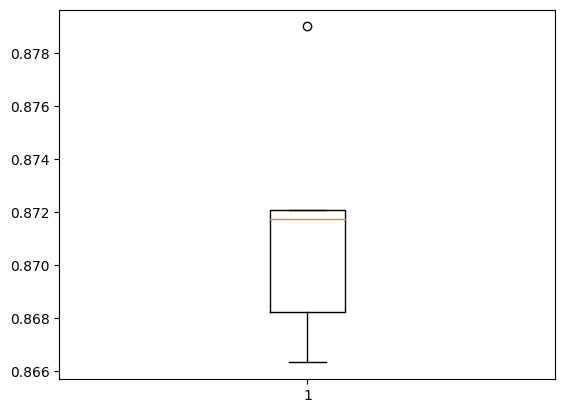

In [20]:
# Graficar boxplot de las acuracias obtenidas en crosvalidacion de cada arquitectura entrenada en crosvalidacion
show_boxplot_accuracy(cv_accuracies)



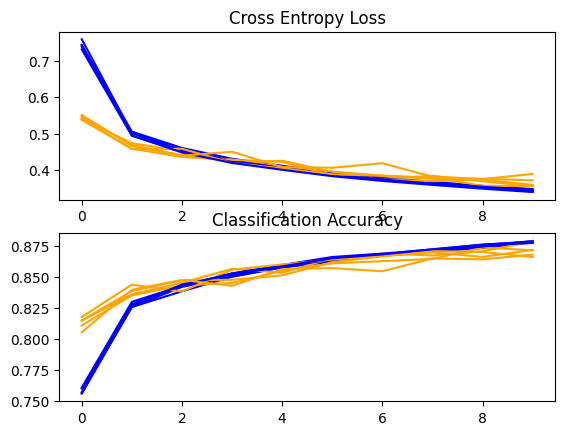

In [21]:
# Graficar curvas de aprendizaje obtenidas en crosvalidacion de cada arquitectura entrenada en crosvalidacion
plot_learning_curves(cv_histories)

**P7.(2 pt) Describir qué características tienen que tener las curvas de aprendizaje para determinar si existe tendencia a overfitting.  Indicar si ello está ocurriendo en alguna de las arquitecturas entrenadas en crossvalidacion**

[Respuesta:]

Para saber si esta ocurriendo o si tiene una tendencia a overfitting tenemos que leer las curvas de aprendizaje de nuestras arquitecturas. Para saber si ocurre overfitting debemos identificar la diferencia de espacios entre ambas curvas, si esta va en aumento nos indica que el modelo se esta sobreajustando ("overfitting") lo que sifnifica que se está enfocando demasiado en los datos de entrenamiento.

En nuestro caso vemos que a medida que avanza el entrenamiento el espacio entre ambas curvas se va disminuyendo lo que significa que no tiene tendencia a overfitting.


**P8.(2 pt) Escoger un arquitectura, justificando su eleccion y  Entrenar el un modelo final con toda la data de train  y evaluarlo con el data de validacion (cargada en P1)**



In [24]:
#Escriba su código aqui

# define modelo final
modelo_finalMLP = define_modelo_MLP()

# entrena  modelo final
modelo_finalMLP.fit(X_train_norm, y_train_onehot, epochs=10, batch_size=32, verbose=0)

# evalua modelo final en  dataset de validacion
_, acc = modelo_finalMLP.evaluate(X_valid_norm, y_valid_onehot, verbose=0)
print('Accuracy > %.3f' % (acc * 100.0))

output_valid = modelo_finalMLP.predict(X_valid_norm)

Accuracy > 86.930
313/313 [==============================] - 1s 2ms/step


Elegimos esta arquitectura ya que tiene la mejor precisión y a su vez mejores valores para poder dar buenas predicciones de clasificación.

**P9.(1 pt)Analisis de los errores con la matriz de confusion. Dar una interpretacion de la matriz de confusion (en qué clases es más preciso el modelo y en qué clases se confunde más)**

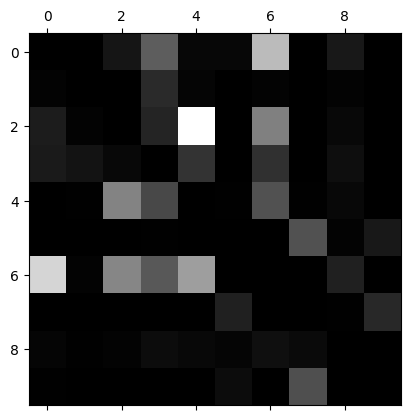

In [25]:
# obtiene las categorias de las muestras de validacion (lo contrario de one hot)
prendas_reales = np.argmax(y_valid_onehot, axis=1)
prendas_predichos = np.argmax(output_valid, axis=1)

# obtiene matriz de confusion
conf_mx = confusion_matrix(prendas_reales, prendas_predichos)

# normaliza las filas de la matriz de confusion

#Escriba su código aqui
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

# coloca 0 en la diagonal para enfocarnos en los errores
np.fill_diagonal(norm_conf_mx, 0)

# plotea
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()


In [26]:
conf_mx

array([[807,   0,  12,  53,   4,   4, 106,   0,  14,   0],
       [  2, 967,   0,  24,   3,   0,   2,   0,   2,   0],
       [ 16,   2, 738,  21, 145,   0,  73,   0,   5,   0],
       [ 15,  11,   5, 904,  29,   0,  28,   0,   8,   0],
       [  0,   1,  75,  41, 830,   1,  46,   1,   5,   0],
       [  0,   0,   0,   1,   0, 937,   0,  46,   2,  14],
       [121,   2,  76,  50,  90,   0, 642,   0,  19,   0],
       [  0,   0,   0,   0,   0,  19,   0, 957,   1,  23],
       [  3,   1,   2,   7,   5,   3,   9,   6, 964,   0],
       [  1,   0,   0,   0,   0,   7,   0,  45,   0, 947]])

Este modelo es más preciso con las prendas de la clase 1 (Trouser) dónde tiene mayor cantidad de aciertos, acertando 967 veces, de ahí sigue las de clase 8, 9, 7,.... Por último este modelo no es preciso con las prendas de la clase 6(Shirt) siendo la clase que menos aciertos tiene 642 y a su vez notamos que suele confundirse mayormente con los de la clase 0 (T- shirt), en 121 veces que se hizo la prueba. Para ello si queremos mejorar este rendimiento debemos notar que se necesitan mayor cantidad de datos de entrenamiento para la clase 6 que se diferencia de la 0.
Otro caso a denotar es la clase 2(Pullover) que se suele confundir (145 veces) de la clase 4(Coat)

**P10.(2 pt)Prueba el clasificador con las 2 imagenes de muestra. ¿El clasificador acierta ambas, si no acierta alguna proponga 2 razones?**

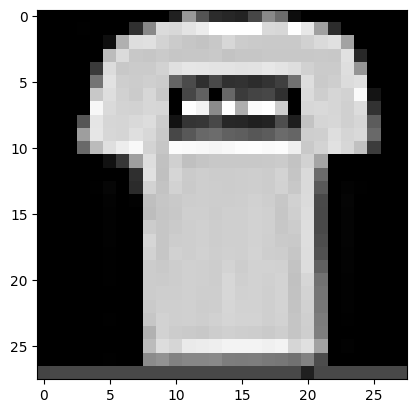

In [32]:
from keras.utils import load_img
from keras.utils import img_to_array


# carga  la primera imagen  del archivo  (Prueba_lab_10.png)

#Escriba su código aqui

img = load_img('Prueba_lab_10.png', grayscale=True, target_size=(28, 28))

# muestra imagen cargada
plt.imshow(img, cmap=plt.cm.gray)

# convierte a array
img = img_to_array(img)

# prepara la imagen como una simple muestra para hacer la prediccion
img = img.reshape(1, 28, 28)

# escala los pixels entre 0-1
img = img.astype('float32')
img = img / 255.0



In [33]:
# coloca la imagen en la red y obtiene la prediccion
output = modelo_finalMLP.predict(img)

print(output)
print('Prenda predicha = {}'.format(np.argmax(output)))

1/1 [==============================] - 0s 17ms/step
[[9.8296803e-01 1.4982432e-07 1.3105008e-04 4.0060517e-05 2.4912197e-07
  3.0114172e-10 1.6858920e-02 3.6050420e-09 1.6163152e-06 5.6340360e-10]]
Prenda predicha = 0


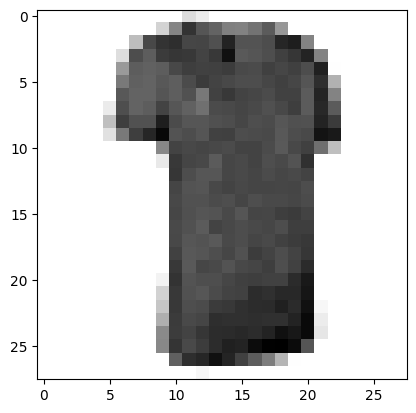

In [34]:


# carga la segunda imagen  del archivo  (Prueba_2_lab_10.png)

#Escriba su código aqui

img2 = load_img('Prueba_2_lab_10.png', grayscale=True, target_size=(28, 28))

# muestra imagen cargada
plt.imshow(img2, cmap=plt.cm.gray)

# convierte a array
img2 = img_to_array(img2)

# prepara la imagen como una simple muestra para hacer la prediccion
img2 = img.reshape(1, 28, 28)

# escala los pixels entre 0-1
img2 = img.astype('float32')
img2 = img2 / 255.0


In [35]:
# coloca la imagen en la red y obtiene la prediccion
output = modelo_finalMLP.predict(img2)

print(output)
print('Ropa predicha = {}'.format(np.argmax(output)))

1/1 [==============================] - 0s 17ms/step
[[0.09771087 0.0218403  0.08767968 0.10943009 0.01900112 0.40316668
  0.11834206 0.08843683 0.03931179 0.0150806 ]]
Ropa predicha = 5


In [ ]:
#Escriba sus comentarios sobre la predicción de ambas predicciones

Notamos que en el caso de la imagen 1 que es T-shirt el modelo pudo predecir correctamente la clase, esto debido a que tambien en nuestra tabla de confusión hay un buen porcentaje de aciertos para la clase 0 (T-shirt).
En el caso de la imagen 2 la predicción es incorrecta indicandonos que es de clase 5 (sandal) siendo esto incorrecto con su verdadera clase (6- Shirt). Una posible razón es que siendo la clase que tiene poca precisión y se confunda con una clase proxima a esta que es la 5.